In [95]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$
$\newcommand{\F}{\mathcal{F}}$

$\newcommand{\tg}{\mathrm{tg}}$
$\newcommand{\ctg}{\mathrm{ctg}}$
$\newcommand{\arctg}{\mathrm{arctg}}$
$\newcommand{\cov}{\mathrm{cov}}$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ggplot import *

In [4]:
from matplotlib.colors import ListedColormap

In [96]:
from sklearn.datasets import load_iris

In [97]:
# Data exploration
from sklearn import datasets
import warnings
# Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# Regression
from sklearn.linear_model import LinearRegression
# Clusterization
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from itertools import permutations
# Feature selection
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
# Learning curve
from sklearn.model_selection import learning_curve
# Validation curve
from sklearn.model_selection import validation_curve
# Grid search
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [98]:
from sklearn.model_selection import GridSearchCV

### Learning from the data
* **Input variables** usually form a matrix $X\in \mathbb{R}^{n\times d}$ with $n$ observations (data points)
and $d$ features (variables). $d$ is called dimensionality of the data.
* **Output variables** $Y\in\mathbb{R}^{n\times k}$ - response or dependent variables.

#### Example: Iris dataset
Iris data set contains information about four features ($d=4$): *sepal length*, *sepal width*, *petal length* 
and *petal width* for three classes (*Iris-Setosa*, *Iris-Versicolor*, *Iris-Virginica*) with 50 instances each
($n=3\cdot 50=150$). 
So input variables form matrix $X\in\mathbb{R}^{150\times 4}$ and response is the vector $Y\in \mathbb{R}^{150}$, encoding class 
labels into numbers $\{0,1,2\}$.

### Read Iris dataset and print it's description:

In [99]:
# read data set
iris = datasets.load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

#### Set input variables and response:

In [109]:
# set Input variables...
X = iris.data
# and response
y = iris.target

In [105]:
# read response names and feature names
labels = iris.get ('target_names')
features = iris.get ('feature_names')
print('Feature names: ', features)
print('Target names: ', labels)

Feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names:  ['setosa' 'versicolor' 'virginica']


In [106]:
# make dictionary
label_dict = dict (zip (labels, np.unique (iris.target)))
feature_dict = dict (zip (list (range (4)), features))

### Check the data

In [107]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target

In [113]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Spoil the data:

In [114]:
iris_df.loc[0, 'petal width (cm)'] = np.nan
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,NaN,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Spoiled data can cause problems:**

In [119]:
np.mean(iris_df['petal width (cm)'].values)

1.2053691275167786

**Check missing data, fix the problem**

In [116]:
# are there NAN's?
iris_df['petal width (cm)'].isnull().values.any()

True

In [117]:
# how many?
iris_df['petal width (cm)'].isnull().sum()

1

In [118]:
# you can just drop the data point
iris_df.dropna(inplace=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


In [120]:
# roll back to initial dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target
iris_df.head()
X = iris.data
# and response
y = iris.target

**Test the data**

We know, that there are only 3 classes:

In [123]:
assert len(iris_df['class'].unique()) == 3

We also don't want NAN's in the data

In [124]:
assert iris_df[features].isnull().sum().any() == 0

**Explore data distribution:**

In [125]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Data vizualization:**

In [126]:
import seaborn as sb

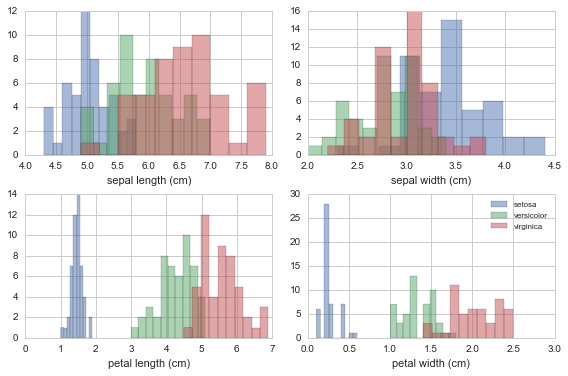

In [128]:
# data exploration
#warnings.filterwarnings("ignore")
with plt.style.context('seaborn-whitegrid'):
    plt.figure (figsize = (8, 6))
    #plt.suptitle('Iris data: explore input variables', fontsize=15)
    for i in range(4):
        plt.subplot (2, 2, i + 1)
        for label in labels:
            plt.hist (X[y == label_dict[label], i], label = label, bins = 10, alpha = 0.5)
        plt.xlabel (feature_dict[i])
    plt.legend (loc = 'upper right', fancybox = True, fontsize = 8)
    plt.tight_layout ()
    plt.subplots_adjust (top = 0.85)
    plt.show ()

In [129]:
class_dict = dict(zip(np.arange(len(labels)), labels))
iris_df['label'] = [class_dict[y] for y in iris_df['class'].values]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


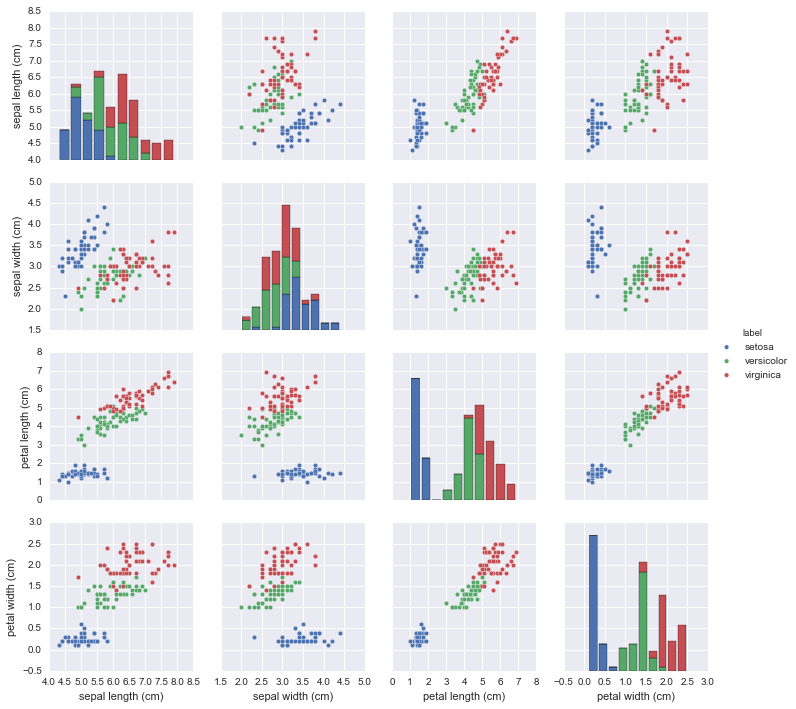

In [27]:
sb.pairplot(iris_df, vars=features, hue='label');

### State the problem

**What kind of data you have?**

*supervized learning*

* labeled input data: consider a classification task - having labeled input data predict labels for the new unlabeled points;
* response (discrete or continuous) varies according to input data: consider regression task - make a model, predicting new response points from past ones.

*unsupervized learning*
* unlabeled data: consider a clusterization task - group input data pints into clusters;

**What is the metric of accuracy for your problem?**

* accuracy for a classification task might be: $\displaystyle{\frac{1}{n}\sum_{i=1}^n\I_{\{y_i^{test} = y_i^{pred}\}}}$;
* accuracy for a regression task might be: $\displaystyle{\mathrm{R}^2=1-\frac{\sum_i(y_i-\hat{y}_i)^2}{(y_i-\bar{y})^2}}$, where $\displaystyle{\bar{y}=\frac{1}{n}\sum_iy_i}$;
* accuracy for a clusterization task might be: $\displaystyle{\frac{\min_{i,j}d(i,j)}{\max_kd^*(k)}}$ - ratio between minimal inter-cluster distance to maximal intra-cluster distance. 

### Loss function

Loss function defines the price of inaccurate solution of the problem.

**Loss function in classification task: **
Let $\X$ be input data points and $y=\{-1,1\}$ be a set of labels for classification problem.
Task is to find function $f:\X\rightarrow \R$, which maps input points to labels.
* Hinge loss: $\displaystyle{V(f(x), y)=\max(0, 1-y\cdot f(x))}$
* Square loss: $\displaystyle{V(f(x), y)=(1-y\cdot f(x))^2}$

**Loss function in regression task:**
Let $\X$ be input points and $y$ - response variable. We are interested in function $y=f(x)$ for $x\in\X$
* Square loss: $V(f(x), y)=(y-f(x))^2$

### Penalty function

Consider a general definition of loss function: $\displaystyle{\min_f\sum_{i}V(f(x_i),y_i)+\alpha R(f)}$

**$L_1$ and $L_2$ regularization for linear regression model**
Consider a linear regression of the form $y=w\X$
* $L_2$ regularization $\displaystyle{min_w\sum_iV(x_i\cdot w, y_i)+\alpha\|w\|^2}$
* $L_1$ regularization $\displaystyle{min_w\sum_iV(x_i\cdot w, y_i)+\alpha|w|}$

### Learning tasks
* **Supervised learning:** set of data points $x$ is mapped to a set of labels $y$, dataset can be represented
as a collection of pairs $(x,y)$. The task is: having labeled examples predict class labels for new input data points.
* **Unsupervised learning:** there are no labels in this case, the task is to discover inner structure of input data.
#### Example: Iris dataset supervised learning task - Classification
Iris dataset features $X$ and class labels $y$ form pairs for **classification** task: having labeled examples, predict
class label for the new data points.
#### Example: Iris dataset unsupervised learning task - Clusterisation
Dropping class label information lead us to a **clusterisation** task: split input data into homogenious groups
according to their feature values. From petal length and petal width histograms one can suppose existance of 
at least two distinct groups, which can be separated from each other.

### Iris dataset classification task
Let's take 2-dimensional data points from input data space for graphical illustration purpose.
1. Split data into **train** and **test** subsets in order to access the accuracy of classification. 
Stay 30% of points for testing purpose.
2. Scale data: $\displaystyle{\frac{x-\mathbb{E}x}{\sqrt{\mathbb{D}x}}}$ - this is especially usefull if different features 
are measured in totally distinct scales.
3. Train classifier on the train data.
4. Access classification accuracy using test data. 

In [131]:
X = iris.data
# and response
y = iris.target
# consider features: petal length and petal width
X = X[:, 2:]
# (1) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [132]:
# (2) Scale data (scale test data using the same average and standard deviation, which were calculated from train subset)
sc = StandardScaler()
sc.fit (X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [133]:
# classify with Support Vector Classifier
clf = SVC (C = 1.0, kernel = 'rbf', gamma = 0.5)
# (3) Train classifier
clf.fit (X_train, y_train)
# (4) Access accuracy
print ('Classification accuracy: %.3f' % clf.score (X_test, y_test))

Classification accuracy: 0.978


In [134]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

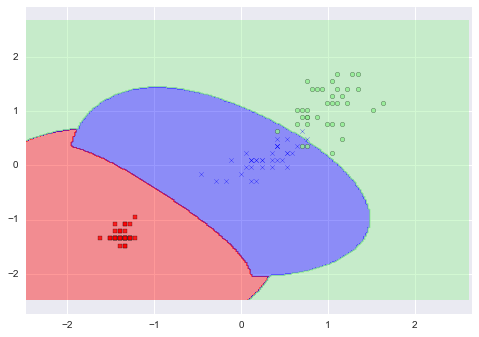

In [32]:
plot_decision_regions(X_train, y_train, clf)

In [135]:
def bootstrap(X, y, scaler, classifier, test_size=0.25, n=100):
    scores = np.zeros(n)
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=test_size)
        scaler.fit (X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        classifier.fit(X_train, y_train)
        scores[i] = classifier.score(X_test, y_test)
    return scores

In [143]:
scores = bootstrap(X, y, sc, clf, n=1000)

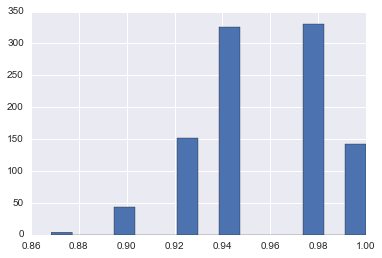

In [144]:
plt.hist(scores, bins=15);

### Iris dataset regression task

Consider a toy example of fiting linear regression: $\displaystyle{y=ax+b+\varepsilon}$, where $\displaystyle{\varepsilon\sim N(0,\sigma^2)}$

In [145]:
X = iris.data
# consider features: petal length and petal width
# take petal width as a response
y = X[:, -1]
# cconsider petal length as input
X = X[:, 2:-1]
# (1) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [146]:
# (2) Scale data (scale test data using the same average and standard deviation, which were calculated from train subset)
sc = StandardScaler()
sc.fit (X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [147]:
# classify with Support Vector Classifier
lr = LinearRegression()
# (3) Train classifier
lr.fit (X_train, y_train)
# (4) Access accuracy
print('Regression R^2: %.3f' % lr.score (X_test, y_test))

Regression R^2: 0.916


In [148]:
print('Regression parameters: coefficients %.3f, intercept: %.3f' % (lr.coef_ , lr.intercept_))

Regression parameters: coefficients 0.723, intercept: 1.169


Obtain regression parameters and construct fitted line:

In [149]:
b = lr.intercept_
a = lr.coef_
x = np.linspace(min(X_train),max(X_train),100)
f = a*x + b

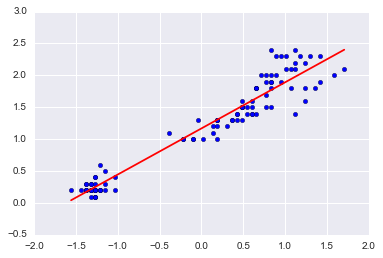

In [150]:
plt.scatter(X_train, y_train)
plt.plot(x, f, color='red');

### Iris dataset clusterization task
In this case we are not going to use (actually we'll not be able to obtain) label data vector $y$.
Looking at input data $X$ we should understand, is there any *hidden variable*, describing data points class membership.

In [151]:
X = iris.data
# and response
y = iris.target
# consider features: petal length and petal width
X = X[:, 2:]
# (1) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [152]:
# (2) Scale data (scale test data using the same average and standard deviation, which were calculated from train subset)
sc = StandardScaler()
sc.fit (X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [153]:
# Set number of clusters to known number of classes
n_clusters = 3
kmeans = KMeans (n_clusters = n_clusters)
kmeans.fit (X_train)
centers = kmeans.cluster_centers_
# correct accuracy calculation: clusterization method doesn't know about class labels, so we have to align y_test and y_pred
y_pred = kmeans.predict (X_test)
items = np.arange (n_clusters)
accuracy = 0
for p in permutations (items):
    predY = np.asarray (np.choose (y_pred, np.asarray (p)))
    accuracy = np.max ((accuracy, accuracy_score (y_test, predY)))

print ('Clusterization accuracy: %.3f' % accuracy)

Clusterization accuracy: 0.956


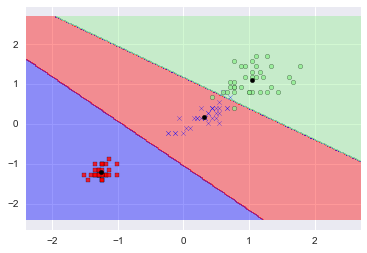

In [154]:
plot_decision_regions (X_train, y_train, kmeans)
plt.scatter(kmeans.cluster_centers_.T[0],kmeans.cluster_centers_.T[1],color='black')

### Feature selection
We had selected **features** (*petal length* and *petal width*) in the above code by hand, but what if $d$ is enormous?
Let's perform feature selection step, automating the process:
* Take initial data $X$ and $y$;
* Split data into train and test subsets;
* Scale the data;
* Fit the classifier;
* Perform model selection;
* Print selected features.

In [155]:
# fix random seed - to reproduce output
np.random.seed (123)

In [156]:
# (1) Take initial data
X, y = iris.data, iris.target

In [157]:
# (2) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [158]:
# (3) Scale data
sc.fit (X_train)
X_train = sc.transform (X_train)
X_test = sc.transform (X_test)

In [159]:
# (3) Train classifier
clf = LinearSVC(C = 0.01, penalty = 'l1', dual = False).fit (X_train, y_train)
# (4) Perform model selection
model = SelectFromModel(clf, prefit = True)
X_sel = model.transform(X_train)
# Print selected features
print ('Selected features:')
selected = model.get_support ()
for i in np.arange (4):
    if selected[i]:
        print (features[i])

Selected features:
petal length (cm)
petal width (cm)


In [160]:
n_feat = len (features)
alphas = np.linspace (0.01, 0.1, 100)
w = np.zeros ((n_feat, alphas.shape[0]))
i = 0
for alpha in alphas:
    clf = LinearSVC (C = alpha, penalty = 'l1', dual = False).fit (X_train, y_train)
    w[:, i] = np.linalg.norm (clf.coef_, axis = 0)
    i += 1

In [165]:
df = pd.DataFrame (w.T)
df.columns = features
df['alpha'] = alphas
df = pd.melt (df, id_vars =['alpha'])

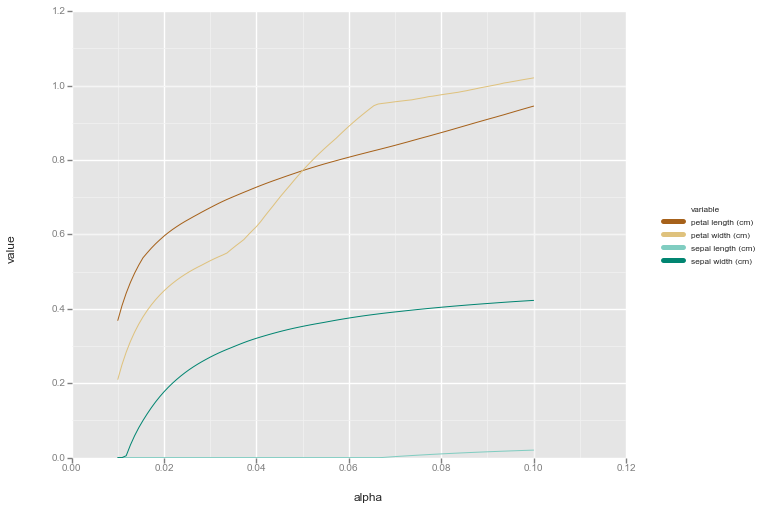

<ggplot: (293246205)>

In [167]:
ggplot(aes (x='alpha', y='value', color = 'variable'), data=df) + geom_line()+scale_color_brewer (type = 'div')

These are exactly those features, we'd selected before.

### Data scaling
What if we'll omit **scaling** step in the previous feature selection procedure

In [168]:
# fix random seed - to reproduce output
np.random.seed (123)

In [169]:
# (1) Take initial data
X, y = iris.data, iris.target

In [170]:
# (2) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [171]:
# (3) Scale data (Omit this step)
#sc.fit(X_train)
#X_train = sc.transform(X_train)
#X_test = sc.transform(X_test)

In [172]:
# (4) Train classifier
clf = LinearSVC (C = 0.01, penalty = 'l1', dual = False).fit (X_train, y_train)

In [173]:
# (5) Perform model selection
model = SelectFromModel (clf, prefit = True)
X_sel = model.transform (X_train)
# Print selected features
print ('Selected features:')
selected = model.get_support ()
for i in np.arange (4):
    if selected[i]:
        print (features[i])

Selected features:
sepal length (cm)
sepal width (cm)
petal length (cm)


In [174]:
n_feat = len (features)
alphas = np.linspace (0.01, 0.1, 100)
w = np.zeros ((n_feat, alphas.shape[0]))
i = 0
for alpha in alphas:
    clf = LinearSVC (C = alpha, penalty = 'l1', dual = False).fit (X_train, y_train)
    w[:, i] = np.linalg.norm (clf.coef_, axis = 0)
    i += 1

In [175]:
df = pd.DataFrame (w.T)
df.columns = features
df['alpha'] = alphas
df = pd.melt (df, id_vars =['alpha'])

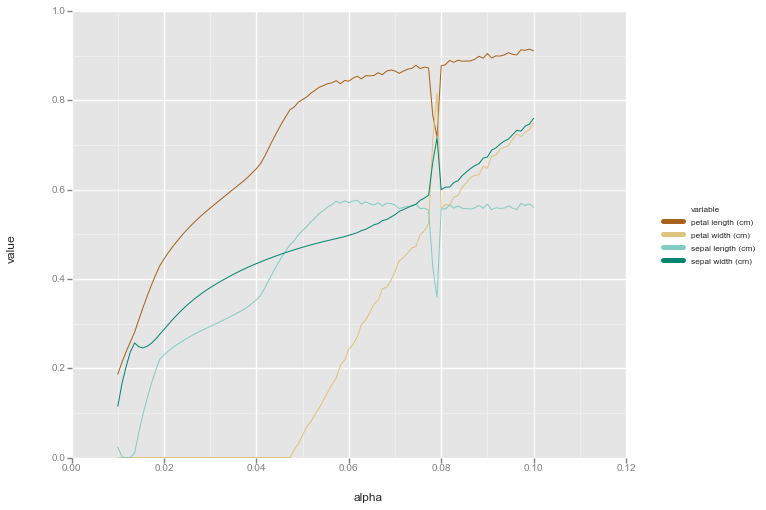

<ggplot: (-9223372036560949388)>

In [176]:
ggplot (aes (x='alpha', y='value', color = 'variable'), data=df) + geom_line()+scale_color_brewer (type = 'div')

We got different subset of features just because of greater variability of *unscaled* sepal length and width!

### Regularization
While performing feature selection, we used $L_1$ penalty in linear SVC, what will happen, if we'll take $L_2$ penalty?

In [63]:
# fix random seed - to reproduce output
np.random.seed (123)

In [64]:
# (1) Take initial data
X, y = iris.data, iris.target

In [65]:
# (2) Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3)

In [66]:
# (3) Scale data
sc.fit (X_train)
X_train = sc.transform (X_train)
X_test = sc.transform (X_test)

In [67]:
# (4) Train classifier
clf = LinearSVC (C = 0.01, penalty = 'l2', dual = False).fit (X_train, y_train)

In [68]:
# (5) Perform model selection
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel (clf, prefit = True)
X_sel = model.transform (X_train)
# Print selected features
print ('Selected features:')
selected = model.get_support ()
for i in np.arange (4):
    if selected[i]:
        print (features[i])

Selected features:
sepal width (cm)
petal length (cm)
petal width (cm)


In [69]:
n_feat = len (features)
alphas = np.linspace (0.01, 0.1, 100)
w = np.zeros ((n_feat, alphas.shape[0]))
i = 0
for alpha in alphas:
    clf = LinearSVC (C = alpha, penalty = 'l2', dual = False).fit (X_train, y_train)
    w[:, i] = np.linalg.norm (clf.coef_, axis = 0)
    i += 1
df = pd.DataFrame (w.T)
df.columns = features
df['alpha'] = alphas
df = pd.melt (df, id_vars =['alpha'])

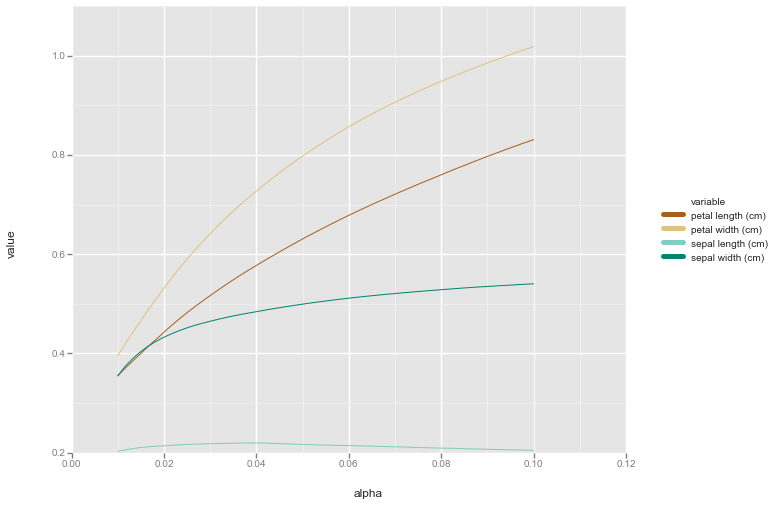

<ggplot: (293640554)>

In [70]:
ggplot (aes (x='alpha', y='value', color = 'variable'), data=df) + geom_line()+scale_color_brewer (type = 'div')

We see, that $L_1$ led us to less number of features (more sparse space).

### Overfitting
To illustrate the notion of **overfitting** let's take small train set and obtain classification accuracy close to 1 
(on the train examples). Taking huge *gamma* in Support Vector Classifier with *rbf* kernel will ensure proclaimed goal, 
but what will happen with test examples classification accuracy? Decision regions are plotted tightly around train examples 
and new (test) point tend to fall outside - this decreases accuracy for test points. We'd **overfitted** our classifier 
on train examples.

In [71]:
np.random.seed (123)
# consider features: petal length and petal width
X = X[:, 2:]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.7)

Scale data (scale test data using the same average and standard deviation, which were calculated from train subset)

In [72]:
# (2) Scale data (scale test data using the same average and standard deviation, 
# which were calculated from train subset)
sc.fit (X_train)
X_train = sc.transform (X_train)
X_test = sc.transform (X_test)
# classify with Support Vector Classifier
clf = SVC (C = 1.0, kernel = 'rbf', gamma = 100.0)

In [73]:
# (3) Train classifier
clf.fit (X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Classification accuracy (test): 0.790
Classification accuracy (train): 1.000


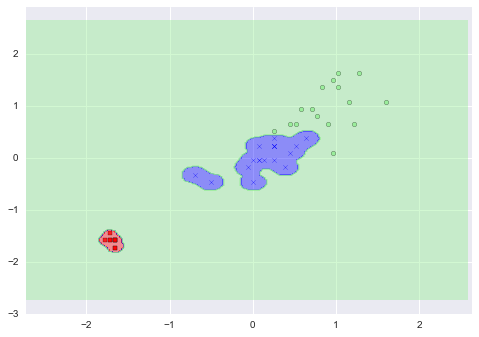

In [74]:
# (4) Access accuracy
print ('Classification accuracy (test): %.3f' % clf.score (X_test, y_test))
print ('Classification accuracy (train): %.3f' % clf.score (X_train, y_train))
plot_decision_regions (X_train, y_train, clf)

### Learning curve (bias-variance trade-off)

In [75]:
# take some classifier to analyse
clf = SVC(C = 1.0, kernel = 'rbf', gamma = 10.)

In [76]:
# shuffle indices
indices = np.arange(y.shape[0])
np.random.shuffle(indices)

In [77]:
# define shuffled samples
Xs, ys = X[indices], y[indices]

In [78]:
# perform cross-validation for defined train sizes
train_sizes, train_scores, test_scores = learning_curve(clf, Xs, ys, cv=10, n_jobs=1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), verbose=0)

In [79]:
# calculate means and std's
train_scores_mean = np.mean (train_scores, axis = 1)
train_scores_std = np.std (train_scores, axis = 1)
test_scores_mean = np.mean (test_scores, axis = 1)
test_scores_std = np.std (test_scores, axis = 1)

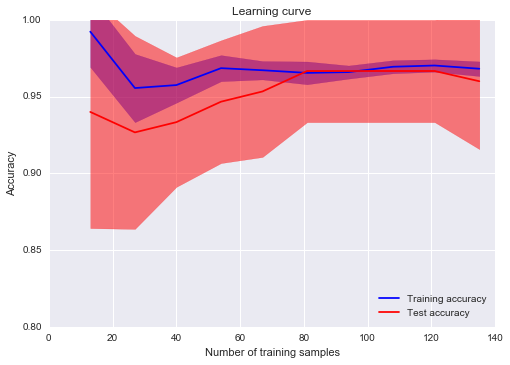

In [80]:
plt.fill_between(train_sizes, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha = 0.5, color = 'blue')
plt.fill_between(train_sizes, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha = 0.5, color = 'red')
plt.plot(train_sizes, train_scores_mean, color = 'blue', label='Training accuracy')
plt.plot(train_sizes, test_scores_mean, color = 'red', label='Test accuracy')
plt.title('Learning curve')
plt.xlabel("Number of training samples")
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim(0.8,1.0)
plt.show()

### Validation curve (overfitting diagnosing tool)
Recently we observed *overfitting* problem, but how to access, what is the right range for the model's parameters 
to prevent overfitting? **Validation curve** is the handy tool to visualize the problem: it shows train and test 
scores depending on parameters values. We can observe, what was mentioned before: the bigger *gamma*s produce 
overfitted models in our case.

In [81]:
# take some classifier to analyse
clf = SVC(C = 1.0, kernel = 'rbf', gamma = 10.0)

In [82]:
# shuffle indices
indices = np.arange(y.shape[0])
np.random.shuffle(indices)

In [83]:
# define shuffled samples
Xs, ys = X[indices], y[indices]

In [84]:
# define parameter range for gamma parameter of rbf kernel
param_range = np.linspace(.01, 1000, 100)

In [85]:
# perform cross-validation for different values of parameter gamma
train_scores, test_scores = validation_curve(clf, Xs, ys, "gamma", 
                                             param_range, cv=10, scoring='accuracy', n_jobs=1)

In [86]:
# calculate means and std's
train_scores_mean = np.mean (train_scores, axis = 1)
train_scores_std = np.std (train_scores, axis = 1)
test_scores_mean = np.mean (test_scores, axis = 1)
test_scores_std = np.std (test_scores, axis = 1)

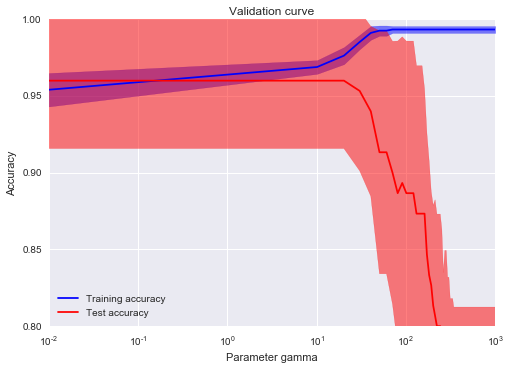

In [87]:
plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, 
                 alpha = 0.5, color = 'blue')
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std, 
                 test_scores_mean + test_scores_std, 
                 alpha = 0.5, color = 'red')
plt.plot(param_range, train_scores_mean, color = 'blue', label='Training accuracy')
plt.plot(param_range, test_scores_mean, color = 'red', label='Test accuracy')
plt.xscale('log')
plt.legend(loc='lower left')
plt.title('Validation curve')
plt.xlabel('Parameter gamma')
plt.ylabel('Accuracy')
plt.ylim([0.8,1.0])
plt.show()

### Hyperparameters tuning via grid search

Grid search is the way how we can tune our parameters ($C$ and $\gamma$ for example)

In [88]:
# define pipeline of methods
pipe_clf = Pipeline([('sc', StandardScaler()),('clf', SVC())])

In [89]:
# define parameter range for C and gamma
param_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

In [90]:
#param_range = np.logspace(start=-2, stop=3., num=10, endpoint=True, base=10)

In [91]:
# define parameter grid for search
param_grid = [{'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]

In [92]:
# define grid search engine
gs = GridSearchCV(estimator=pipe_clf, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=1)

In [93]:
# perform grid search
gs = gs.fit(X_train, y_train)

In [94]:
print('Best score: %.3f' % gs.best_score_)
print('Best parameters:', gs.best_params_)

Best score: 0.956
Best parameters: {'clf__kernel': 'rbf', 'clf__C': 1.0, 'clf__gamma': 10.0}
